In [6]:
import  seaborn as sns
import numpy as np

In [80]:
with open('py_log.log', 'r') as f:
    lines = f.readlines()

for split_point in range(len(lines)):
    if 'split' in lines[split_point]:
        break

classic = lines[: split_point]
ep = lines[split_point + 1: ]

In [81]:
def process_data(data: list[str]):
    return np.array([np.array(l.split(':')[-1].split(' '), dtype=np.float64) for l in data])

In [82]:
classic = process_data(classic)
ep = process_data(ep)

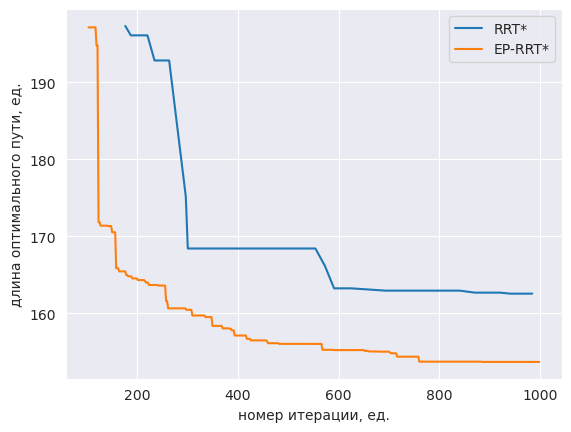

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

tmin = classic[0, 1]
for i in range(len(classic)):
    if classic[i, 1] > tmin:
        classic[i, 1] = tmin
    tmin = classic[i, 1]

data_cl = pd.DataFrame({'номер итерации, ед.': classic[:, 0], 'длина оптимального пути, ед.': classic[:, 1]})
data_ep = pd.DataFrame({'номер итерации, ед.': ep[:, 0], 'длина оптимального пути, ед.': ep[:, 1]})
#p1 = sns.lineplot(data=data_cl, x='номер итерации, ед.', y='длина оптимального пути, ед.')
#p2 = sns.lineplot(data=data_ep, x='номер итерации, ед.', y='длина оптимального пути, ед.', c='red')
plt.plot(classic[:, 0], classic[:, 1])
plt.plot(ep[:, 0], ep[:, 1])
plt.legend(labels=['RRT*', 'EP-RRT*'])
plt.xlabel("номер итерации, ед.")
plt.ylabel("длина оптимального пути, ед.")
plt.show()